In [1]:
#import libraries
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)
import matplotlib.pyplot 
import Bio
#Neighbour Join Tree
import pandas as pd
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
import matplotlib.pyplot as plt
import Bio.Phylo as Phylo
import os
import Bio.Phylo as Phylo
import warnings

In [2]:
# pd.set_option('display.max_rows', None)
df_weekly_sum = pd.read_csv('dpgr_gisaid_countries_1.csv')
print(df_weekly_sum.head())

  Clade                   Date                     Location  Freq
0    GH  2019-12-30/2020-01-05  Africa / Cameroon / Yaoundé     1
1    GH  2019-12-30/2020-01-05      Africa / Gambia / Kombo     2
2    GH  2019-12-30/2020-01-05             Africa / Morocco     2
3    GH  2019-12-30/2020-01-05      Africa / Niger / Niamey     1
4    GH  2019-12-30/2020-01-05     Africa / Senegal / Louga     1


In [3]:
#clades contains all GISAID clades, VOC contains GISAID clades containing VOCs
#change clade input to whichever you want to analyze
clades = ['G','GH','GK','GR','GRA','GRY','GV','L','O','S','V']
# VOC = ['Delta', 'Omicron']
VOC = ['GH','GK','GR','GRA','GRY']

clade_input = VOC    ####

# # #function to generate distance matrix based on quarter, year, and continent
# def create_distance_matrix(df,quarter_continent, variant_choice_set):
#     tmp = df['Variant'].str.split('vs', expand=True)
#     clade_list = tmp[0].unique()
#     clade_list = [variant for variant in clade_list if variant in variant_choice_set]
#     distance_matrix = pd.DataFrame(index = clade_list)
#     distance_matrix[clade_list] = np.nan
#     #fill in distance matrix
#     for i in clade_list:
#         for j in clade_list:
#             if i == j:
#                 distance_matrix.loc[i,j] = 0
#             else:
#                 distance_matrix.loc[i,j] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j),
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#                 distance_matrix.loc[j,i] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#     return distance_matrix

# #distance matrix where you can select which variants to compare 
# def create_distance_matrix(df, quarter_continent, variant_choice_set):
#     clade_list = set()
#     for variant in df['Variant']:
#         clades = variant.split(' vs ')
#         clade_list.update(clades)
# #         print(clade_list)

    
#     clade_list = sorted(clade_list)
#     clade_list = [variant for variant in clade_list if variant in variant_choice_set] #
#     distance_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
    
#     distance_matrix.fillna(0, inplace=True)

#     for i in clade_list:
#         for j in clade_list:
#             if i != j:
#                 variant_1 = f"{i} vs {j}"
#                 variant_2 = f"{j} vs {i}"
#                 slope_1 = df.loc[df['Variant'] == variant_1, 'Slope']
#                 slope_2 = df.loc[df['Variant'] == variant_2, 'Slope']
#                 slope = slope_1.iloc[0] if not slope_1.empty else slope_2.iloc[0]
#                 distance_matrix.loc[i, j] = abs(slope)

#     return distance_matrix
# #     print(distance_matrix)

#updated distance matrix which resolves the symmetricity issue
def create_distance_matrix(df, quarter_continent, variant_choice_set):
    clade_list = set()
    for variant in df['Clade']:
        clades = variant.split(' vs ')
        clade_list.update(clades)
#         print(clade_list)

    #this code snippet orders the clade lista ccording to this order : order = ['GRY', 'GH', 'GK', 'GRA', 'GR']
    #which helps to create a distance matrix of our desired order 
    order = ['GRY', 'GH', 'GK', 'GRA', 'GR']

    clade_list = sorted(clade_list, key=lambda x: order.index(x))

#     clade_list = sorted(clade_list)
#     print(f"sorted_clade_list: {clade_list}")
    clade_list = [variant for variant in clade_list if variant in variant_choice_set] #
#     clade_list = clade_list.reverse()
#     print(clade_list)
    distance_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
    
    distance_matrix.fillna(0, inplace=True)

    for i in clade_list:
        for j in clade_list:
            if i != j:
                variant_1 = f"{i} vs {j}"
                variant_2 = f"{j} vs {i}"
                slope_1 = df.loc[df['Clade'] == variant_1, 'Slope']
                slope_2 = df.loc[df['Clade'] == variant_2, 'Slope']
                slope = slope_1.iloc[0] if not slope_1.empty else slope_2.iloc[0]
                distance_matrix.loc[i, j] = abs(slope)
                distance_matrix.loc[j, i] = abs(slope)  # Add this line to ensure symmetry

    return distance_matrix
#     print(distance_matrix)


# # #function to generate difference matrix based on quarter, year, and continent
# def create_difference_matrix(df,quarter_continent, variant_choice_set):
#     tmp = df['Variant'].str.split('vs', expand=True)
#     clade_list = tmp[0].unique()
#     clade_list = [variant for variant in clade_list if variant in variant_choice_set] #
#     difference_matrix = pd.DataFrame(index = clade_list)
#     difference_matrix[clade_list] = np.nan
#     #fill in difference matrix
#     for i in clade_list:
#         for j in clade_list:
#             if i == j:
#                 difference_matrix.loc[i,j] = 0
#             else:
#                 difference_matrix.loc[i,j] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j),
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#                 difference_matrix.loc[j,i] = (abs((df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                         quarter_continent].iloc[0] + 
#                                             df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j), 
#                                                    quarter_continent].iloc[0])/2))
#     #if row_vs_col is a negative value, make it negative in difference matrix
#     for i,v in difference_matrix.iterrows():
#         for j in difference_matrix:
#             if i != j:
#                 if (df.loc[df['Variant'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
#                     difference_matrix.loc[i,j] *= -1
#     return difference_matrix



# #difference matrix where you can select which variants to compare 
# def create_difference_matrix(df, quarter_continent, variant_choice_set):
#     clade_list = set()
#     for variant in df['Clade']:
#         clades = variant.split(' vs ')
#         clade_list.update(clades)
# #         print(clade_list)

    
#     clade_list = sorted(clade_list)
# #     print(clade_list)
#     clade_list = [variant for variant in clade_list if variant in variant_choice_set] #
# #     clade_list = clade_list.reverse()
#     difference_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
    
#     difference_matrix.fillna(0, inplace=True)

#     for i in clade_list:
#         for j in clade_list:
#             if i != j:
#                 variant_1 = f"{i} vs {j}"
#                 variant_2 = f"{j} vs {i}"
#                 slope_1 = df.loc[df['Clade'] == variant_1, 'Slope']
#                 slope_2 = df.loc[df['Clade'] == variant_2, 'Slope']
#                 slope = slope_1.iloc[0] if not slope_1.empty else slope_2.iloc[0]
#                 difference_matrix.loc[i, j] = abs(slope)
#                 difference_matrix.loc[j, i] = abs(slope)  # Add this line to ensure symmetry

#     #if row_vs_col is a negative value, make it negative in difference matrix
#     for i,v in difference_matrix.iterrows():
#         for j in difference_matrix:
#             if i != j:
#                 if (df.loc[df['Clade'] == '{a} vs {b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
#                     difference_matrix.loc[i,j] *= -1
#     return difference_matrix

def create_difference_matrix(distance_matrix):
    difference_matrix = distance_matrix.copy()

    # Iterate over the rows and columns of the difference_matrix
    for i, row in difference_matrix.iterrows():
        for j in difference_matrix.columns:
            if i != j:
                # Check if the row_vs_col value is negative
                if distance_matrix.loc[i, j] < 0:
                    # Set values above the main diagonal to the negative value
                    difference_matrix.loc[i, j] = -abs(difference_matrix.loc[i, j])
                    difference_matrix.loc[j, i] = abs(difference_matrix.loc[i, j])
                else:
                    # Set values below the main diagonal to the positive value
                    difference_matrix.loc[i, j] = abs(difference_matrix.loc[i, j])
                    difference_matrix.loc[j, i] = -abs(difference_matrix.loc[i, j])

    return difference_matrix

#function to calculate the log transformed ratio of two clades
def transform_ratio(clade_1, clade_2):
    return np.log10(clade_1/clade_2)

def time_frame(df, start_date, end_date):  #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
    for i in dataframe.columns.tolist():
        if dataframe[i].isnull().all():
            dataframe = dataframe.drop(i, axis=1)
    return dataframe


# def time_frame_no_cumsum(df,time_window):
#     dataframe = df.loc[df['Collection date'].isin(time_window)]
#     return dataframe

def time_frame_no_cumsum(df,start_date, end_date): #updated
    time_window = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m').unique().tolist()
    print(time_window)
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    return dataframe

#function returns slope of clade advantage plots
def slope_calc(day, pairwise_fitness):
#     print(day)
#     print(pairwise_fitness)
    par = np.polyfit(day, pairwise_fitness, 1, full = True)
    slope= par[0][0]
    return slope

def clade_comparisons(df):
    clade_list = [i for i in clade_input if i in df.columns.tolist()]

    df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
    df['days'] = df['date_ordinal'] - 737425
    #calculate log ratio for each clade comparison
    for i in clade_list:
        for j in clade_list:
            if i != j:
                df['{a} vs {b}'.format(a=i,b=j)] = df.apply(lambda row : 
                                                                        transform_ratio(row['{a}'.format(a=i)],
                                                                                        row['{b}'.format(b=j)]),
                                                                                        axis = 1)
    clade_list.append('date_ordinal')
    df = df.drop(clade_list, axis=1)
    return df

### *Use the automation mine function to create the distance matrix in variant choice set for specific time window*

In [4]:
# This function finds the distance matrix among all the clades 

def automation_mine(country, dataset, start, end, variant_choice_set):
    
    df_weekly = dataset[dataset['Location'] == country]
    
#     # Set the option to display all rows
#     pd.set_option('display.max_rows', None)
#     print(df_weekly)
    
#     print(df_weekly.head())
    #print unique variants available in the target location
    print(f"Vaiants available at {country} : {df_weekly['Clade'].unique()}")
    #pivot dataframe so that index is date and columns are clades
    df_weekly = df_weekly.pivot(index = 'Date', columns = 'Clade', values = 'Freq')
    df_weekly = df_weekly.reset_index()
    

    df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])

    #split date column so we can retrieve month and year
    tmp = df_weekly['Date'].str.rsplit('-',n=3, expand = True)
    tmp.columns = ['0','1','2','3']

    #collection date column contains month and year of each week 
    df_weekly['Collection date'] = tmp['0']
    cols = df_weekly.columns.tolist()
    cols = cols[0:1] + cols[-1:] + cols[1:-1]
    df_weekly = df_weekly[cols]
#     print(f"df_weekly :\n {df_weekly.head}")
#     print(f"df_weekly : \n {df_weekly.columns}")
           
    #specify time frame to analyze
    df_sum = time_frame(df_weekly, start, end)
    # df_sum.to_csv(country+"df_sum"+r'.csv')
#     print(f"df_sum :\n {df_sum}")
    #calculate log comparisons at each week
    df_ = clade_comparisons(df_sum)
#     print(f" df_ : \n{df_}")
    # df_.to_csv(country+'_clade_comparison')
    df_['days'] -= df_['days'].iloc[0]
#     print(f"df_ :\n {df_}")
#     print(f"df_ :\n {df_.columns}")
    

    #Make the combinations of the variant choice set
    combinations = []

    # Append 'Omicron vs Delta'
    combination1 = ' vs '.join(variant_choice_set)
    combinations.append(combination1)
#     print(combinations)

    # Append 'Delta vs Omicron'
    combination2 = ' vs '.join(sorted(list(variant_choice_set), reverse=True))
    combinations.append(combination2)
#     print(combinations)

    #calculate slopes, have to disregard nans
    df_slopes = pd.DataFrame()
    cols = df_.columns.to_list()
#     print(f"df_ columns : {cols}")
    df_slopes['Clade'] = cols[3:]
#     print(f"df_slopes:\n {df_slopes}")
    slopes = []
    for i,v in enumerate(df_.iloc[:,3:]):
#         tmp = df_[~df_.iloc[:,i+3].isnull()] ##issue (it chooses columns using the index)
        tmp = df_[df_.loc[:, df_.columns.isin(combinations)].notnull().any(axis=1)] #it chooses the columns that are given in the variant_choice set
        tmp['pseudo_time'] = np.array(range(0, tmp.shape[0] ))*7
#         print(f"tmp :\n {tmp}")
        slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp.iloc[0:len(tmp),i+3]))
#         slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp[v])) 
        #print(len(slopes))
#         print(df_slopes)
#     print(f"tmp :\n {tmp}")
#     print(f"Slopes: {slopes}")
    df_slopes['Slope'] = slopes
#     print(df_slopes)
    df_slopes = pd.DataFrame(df_slopes)   #changed
    
#     dist_mat = create_distance_matrix(df_slopes,'Slope')
#     # dist_mat.to_csv(country+"_dist_mat_WHO"+r'.csv')
#     print(f"distance matrix :\n {dist_mat}")

#     #define the file path
#     file_path = f'/scr/mjpantho/Pantho_differential_fitness/Distance_matrix_who/{country + "_" + start + "_" + end + "_dist_mat_who_labels"}.csv'

    dist_mat = create_distance_matrix(df_slopes, 'Slope', variant_choice_set)
#     dist_mat.to_csv(file_path, index=True)
    print(f"Diatance matrix: \n {dist_mat}")
    
    dist_mat = create_distance_matrix(df_slopes, 'Slope', variant_choice_set)
    file_name = f"{country}_{start}_{end}_gisaid_dist_mat.csv"
    directory = "/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    file_path = os.path.join(directory, file_name)
    dist_mat.to_csv(file_path, index=True)
    if os.path.isfile(file_path):
        print(f"Distance matrix saved at: {file_path}")
    else:
        print("Error: Failed to save the distance matrix.")


#     # Specify the directory path
#     directory = "/scr/mjpantho/Pantho_differential_fitness/omicron_vs_delta_regression_plots/"

#     # Create the directory if it doesn't exist
#     if not os.path.exists(directory):
#         os.makedirs(directory)
    
#     dif_mat = create_difference_matrix(df_slopes,'Slope')
#     # dif_mat.to_csv(country+"_dif_mat_WHO"+r'.csv')
#     # print(f"difference matrix :\n {dif_mat}")

#     #Plot distance matrix as clustermap
#     sns.set(rc = {'figure.figsize':(10, 20)}, font_scale = 1.8)

#     #create distance array from distance matrix
#     distance_array = ssd.squareform(dist_mat) 

#     #create linkage object
#     distance_linkage = hierarchy.linkage(distance_array)
#     print(distance_array.shape)
#     print(dist_mat.shape)

#     #display clustermap
#     g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
#                         cmap = 'coolwarm',vmin=-.023,vmax=0.023, cbar_pos=(0.971, 0.087, .03, 0.7))                     
#     # g.fig.set_size_inches(10, 10)
#     # plt.savefig(country+"_clustermap_WHO"+'.jpg', dpi = 300, bbox_inches='tight')
#     return g

### *Combine the distance matrices and plot the heatmap for getting the combined distance matrix for all the variants*

In [9]:
def heatmaps_from_combined_dist_map(clade_list, df1, df2, df3, location): #pass dataframe in a sorted order
    # create an empty dataframe
#     clade_list = sorted(clade_list)

    #this code snippet orders the clade list ccording to this order : order = ['GRY', 'GH', 'GK', 'GRA', 'GR']
    #which helps to create a distance matrix of our desired order 
    order = ['GRY', 'GH', 'GK', 'GRA', 'GR']

    clade_list = sorted(clade_list, key=lambda x: order.index(x))
    
    distance_matrix = pd.DataFrame(index=clade_list, columns=clade_list)
    distance_matrix.fillna(0, inplace=True)
#     print(distance_matrix)
    
    # assign values to the empty dataframe
    distance_matrix.iloc[0:2, 0:2] = pd.DataFrame(df1)
    distance_matrix.iloc[1:3, 1:3] = pd.DataFrame(df2)
    distance_matrix.iloc[2:4, 2:4] = pd.DataFrame(df3)
#     print(distance_matrix)
    
    distance_matrix.iloc[0,2] = distance_matrix.iloc[0,1] + distance_matrix.iloc[1,2]
    distance_matrix.iloc[0,3] = distance_matrix.iloc[0,2] + distance_matrix.iloc[3,2]
    distance_matrix.iloc[1,3] = distance_matrix.iloc[1,2] + distance_matrix.iloc[2,3]
    distance_matrix.iloc[2,0] = distance_matrix.iloc[0,2] 
    distance_matrix.iloc[3,0] = distance_matrix.iloc[0,3] 
    distance_matrix.iloc[3,1] = distance_matrix.iloc[1,3] 
    
    # Set the index of the dataframe to the first column
    distance_matrix.set_index(distance_matrix.columns, inplace=True)
    print(f"Distance Matrix :\n {distance_matrix}")
    
    #export the combined distance matrix
    #export the distance matrix
    # Specify the directory path
    directory = "/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/"

    
    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the figure to the specified directory with DPI set to 300
    filename = os.path.join(directory, location + "_continent_combined_distance_matrix_for_gisaid_labels.csv")
    print(f"Combined distance matrix saved at : {filename}")
    distance_matrix.to_csv(filename, index=False)

    
    dif_mat = create_difference_matrix(distance_matrix)
    # dif_mat.to_csv(country+"_dif_mat_WHO"+r'.csv')
    print(f"difference matrix :\n {dif_mat}")
    
    #Plot distance matrix as clustermap
    sns.set(rc={'figure.figsize': (2, 2)}, font_scale=1.2)  # Adjust the figsize as per your preference

    #create distance array from distance matrix
    distance_array = ssd.squareform(distance_matrix) 

    #create linkage object
    distance_linkage = hierarchy.linkage(distance_array)
#     print(distance_array.shape)
#     print(dist_mat.shape)

    # # Display clustermap
    # g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
    #                cmap='coolwarm', vmin=-.023, vmax=0.023, cbar_pos=(0.978, 0.174, .05, 0.57 ),figsize=(4, 4))
    
    # Display clustermap with annotations
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
                           cmap='coolwarm', vmin=-0.023, vmax=0.023, cbar_pos=(0.969, 0.147, 0.04, 0.7),
                           annot=True, fmt='.3f', annot_kws={"size": 7}, figsize=(4.6, 4.6), dendrogram_ratio=0.102)
    
        # Adjust colorbar label size
        cax = g.cax
        cax.set_yticklabels(cax.get_yticklabels(), fontsize=7)

#***************************************************************************************************************************************
    #Put the labels compared in each cell as text
    # Get the x-axis and y-axis labels from the clustermap plot
    x_labels = [label.get_text() for label in g.ax_heatmap.get_xticklabels()]
    y_labels = [label.get_text() for label in g.ax_heatmap.get_yticklabels()]
    # Add annotated texts in the cells
    for i in range(dif_mat.shape[0]):
        for j in range(dif_mat.shape[1]):
            text = f"{x_labels[i]} Vs. {y_labels[j]}"
            # value = f"{dif_mat.iloc[i, j]:.3f}"
            text_x = g.ax_heatmap.get_xticks()[j]
            text_y = g.ax_heatmap.get_yticks()[i]
            g.ax_heatmap.text(text_x, text_y + 0.2, text, ha='center', va='center', fontsize=5.5, color='black')
            
#***************************************************************************************************************************************
    g.fig.suptitle(f'Clustermap of Variant of Concerns(GISAID labels) \nLocation: {location}', fontsize = 8.5, y = 1.05)

    # Specify the directory path
    directory = "/scr/mjpantho/Pantho_differential_fitness/combined_heatmaps_countries_GISAID_labels/"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the figure to the specified directory with DPI set to 300
    filename = os.path.join(directory, location + "_gisaid_combined_heatmaps_countries.png")
    g.savefig(filename, dpi=300, bbox_inches="tight")
    return g

    
    '''
        This portion of code plots the step plot of progressive fitness growth 
        of the variants
    '''
    #*******************************************************************************************************************
#     #export the combined distance matrix
#     #export the distance matrix
#     # Specify the directory path
#     directory = "/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/"

#     # Create the directory if it doesn't exist
#     if not os.path.exists(directory):
#         os.makedirs(directory)

#     # Save the figure to the specified directory with DPI set to 300
#     filename = os.path.join(directory, location + "_combined_distance_matrix_for_who_labels.csv")
#     distance_matrix.to_csv(filename, index=False)
    
#     # Create a step plot
#     plt.figure(figsize=(3, 3))  # Set figure size to 3 by 3
#     plt.step(distance_matrix.index, distance_matrix.values[0], linewidth=1.5, color='red')

#     # Add labels and title
# #     plt.xlabel('Variants', fontsize=12)
#     plt.ylabel('Fitness Value', fontsize=12)
#     plt.title(f'Progressive fitness growth of Covid Variants\n Location: {location}', fontsize=12)

#     # Set the background color to white
#     plt.gca().set_facecolor('white')

#     # Add axis lines
#     plt.axhline(0, color='black', linewidth=0.5)
#     plt.axvline(-0.1, color='black', linewidth=0.5)
    
#     # Rotate x-axis labels
# #     plt.xticks(range(len(distance_matrix.index)), distance_matrix.index, rotation=90, fontsize=8)  # Adjust fontsize as needed
#     plt.xticks([])  # Remove x-axis tick labels
#     plt.yticks()

#     # Display the labels on the graph
#     categories = ['alpha', 'beta', 'delta', 'omicron']
#     x = range(len(categories))
#     values = distance_matrix.values[0][0:5]
#     print(values)
#     for i in range(len(categories)):
#         plt.text(x[i], values[i], f'{categories[i]}', ha='left', va='bottom')

# #     # Rotate x-axis labels
# #     plt.xticks(rotation=90)
# #     plt.yticks()

#     # Specify the directory path
#     directory = "/scr/mjpantho/Pantho_differential_fitness/figures_for_step_plot/"

#     # Create the directory if it doesn't exist
#     if not os.path.exists(directory):
#         os.makedirs(directory)

#     # Save the figure to the specified directory with DPI set to 300
#     filename = os.path.join(directory, location + "_variant_step_plot.png")
#     plt.savefig(filename, dpi=300, bbox_inches="tight")
    
#     # Show the plot
#     plt.show()
    #*********************************************************************************************************************

## France 

In [10]:
pd.set_option('display.max_rows', None)
print(df_weekly_sum[df_weekly_sum['Location'] == 'France'])

       Clade                   Date Location   Freq
31        GH  2019-12-30/2020-01-05   France     80
49        GH  2020-01-06/2020-01-12   France      2
61        GH  2020-02-03/2020-02-09   France      1
64        GH  2020-02-10/2020-02-16   France      2
68        GH  2020-02-17/2020-02-23   France      4
88        GH  2020-02-24/2020-03-01   France    395
122       GH  2020-03-02/2020-03-08   France     66
188       GH  2020-03-09/2020-03-15   France    148
306       GH  2020-03-16/2020-03-22   France    330
460       GH  2020-03-23/2020-03-29   France    491
614       GH  2020-03-30/2020-04-05   France    986
744       GH  2020-04-06/2020-04-12   France    422
831       GH  2020-04-13/2020-04-19   France    155
927       GH  2020-04-20/2020-04-26   France     67
1048      GH  2020-04-27/2020-05-03   France     95
1136      GH  2020-05-04/2020-05-10   France     48
1207      GH  2020-05-11/2020-05-17   France     11
1289      GH  2020-05-18/2020-05-24   France     10
1371      GH

In [11]:
# #automation function finds the diatance matrix
automation_mine('France', df_weekly_sum, start = '2021-01', end = '2021-02', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('France', df_weekly_sum, start = '2021-05', end = '2021-07', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('France', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at France : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-01', '2021-02']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.002067
GH   0.002067  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/France_2021-01_2021-02_gisaid_dist_mat.csv
Vaiants available at France : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06', '2021-07']
Diatance matrix: 
           GH        GK
GH  0.000000  0.027463
GK  0.027463  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/France_2021-05_2021-07_gisaid_dist_mat.csv
Vaiants available at France : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.070252
GRA  0.070252  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/France_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.002067  0.029530  0.099782
GH   0.002067  0.000000  0.027463  0.097715
GK   0.029530  0.027463  0.000000  0.070252
GRA  0.099782  0.097715  0.070252  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/France_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.002067 -0.029530 -0.099782
GH   0.002067  0.000000 -0.027463 -0.097715
GK   0.029530  0.027463  0.000000 -0.070252
GRA  0.099782  0.097715  0.070252  0.000000


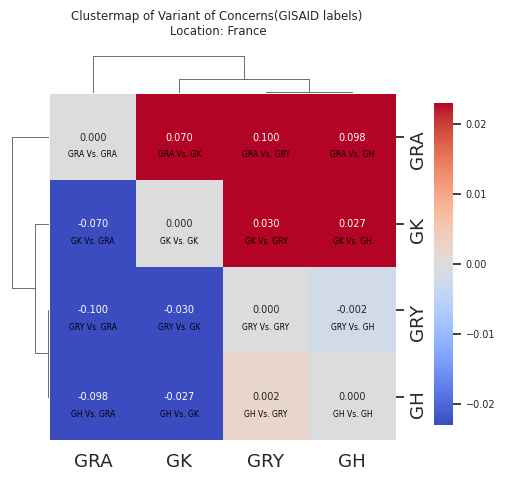

In [12]:
gry_gh_fr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/France_2021-01_2021-02_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_fr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/France_2021-05_2021-07_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_fr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/France_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_fr = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_fr,
                                                    gh_gk_fr,
                                                    gk_gra_fr,
                                                    'France')
combined_distance_matrix_fr = pd.DataFrame(clustermap_obj_fr.data)

## Belgium

In [13]:
# #automation function finds the diatance matrix
automation_mine('Belgium', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Belgium', df_weekly_sum, start = '2021-04', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Belgium', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Belgium : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.027459
GH   0.027459  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Belgium_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Belgium : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-04', '2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.018209
GK  0.018209  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Belgium_2021-04_2021-06_gisaid_dist_mat.csv
Vaiants available at Belgium : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.063801
GRA  0.063801  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Belgium_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.027459  0.045668  0.109469
GH   0.027459  0.000000  0.018209  0.082009
GK   0.045668  0.018209  0.000000  0.063801
GRA  0.109469  0.082009  0.063801  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Belgium_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.027459 -0.045668 -0.109469
GH   0.027459  0.000000 -0.018209 -0.082009
GK   0.045668  0.018209  0.000000 -0.063801
GRA  0.109469  0.082009  0.063801  0.000000


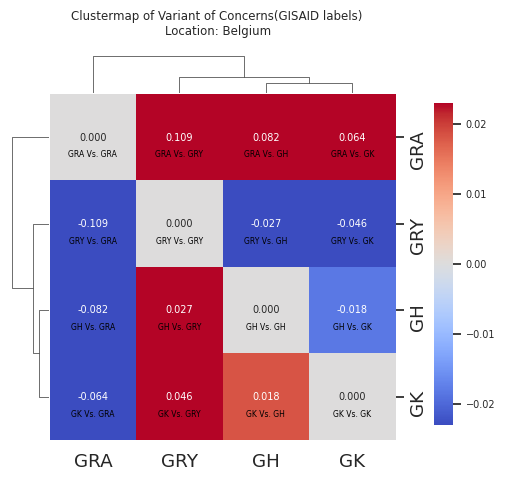

In [14]:
gry_gh_bl = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Belgium_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_bl = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Belgium_2021-04_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_bl = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Belgium_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_bl = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_bl,
                                                    gh_gk_bl,
                                                    gk_gra_bl,
                                                    'Belgium')
combined_distance_matrix_bl = pd.DataFrame(clustermap_obj_bl.data)

## Canada

In [15]:
# #automation function finds the diatance matrix
automation_mine('Canada', df_weekly_sum, start = '2021-01', end = '2021-02', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Canada', df_weekly_sum, start = '2021-03', end = '2021-04', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Canada', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Canada : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-01', '2021-02']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.030905
GH   0.030905  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Canada_2021-01_2021-02_gisaid_dist_mat.csv
Vaiants available at Canada : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-03', '2021-04']
Diatance matrix: 
           GH        GK
GH  0.000000  0.043545
GK  0.043545  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Canada_2021-03_2021-04_gisaid_dist_mat.csv
Vaiants available at Canada : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
           GK      GRA
GK   0.00000  0.06868
GRA  0.06868  0.00000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Canada_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.030905  0.074450  0.143131
GH   0.030905  0.000000  0.043545  0.112225
GK   0.074450  0.043545  0.000000  0.068680
GRA  0.143131  0.112225  0.068680  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Canada_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.030905 -0.074450 -0.143131
GH   0.030905  0.000000 -0.043545 -0.112225
GK   0.074450  0.043545  0.000000 -0.068680
GRA  0.143131  0.112225  0.068680  0.000000


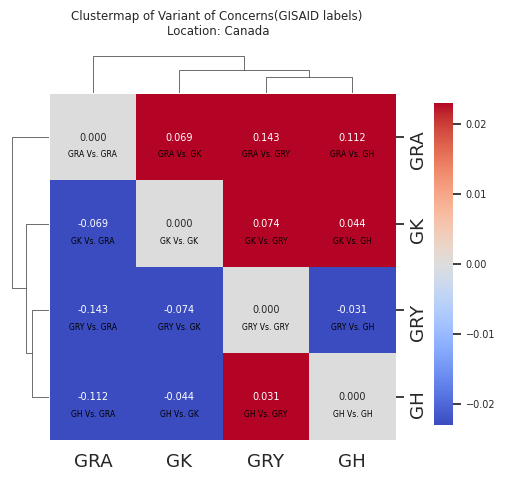

In [16]:
gry_gh_ca = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Canada_2021-01_2021-02_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_ca = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Canada_2021-03_2021-04_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_ca = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Canada_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_ca = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_ca,
                                                    gh_gk_ca,
                                                    gk_gra_ca,
                                                    'Canada')
combined_distance_matrix_ca = pd.DataFrame(clustermap_obj_ca.data)

## Denmark

In [17]:
# #automation function finds the diatance matrix
automation_mine('Denmark', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Denmark', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Denmark', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Denmark : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.027775
GH   0.027775  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Denmark_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Denmark : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.027812
GK  0.027812  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Denmark_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Denmark : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.080229
GRA  0.080229  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Denmark_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.027775  0.055586  0.135815
GH   0.027775  0.000000  0.027812  0.108040
GK   0.055586  0.027812  0.000000  0.080229
GRA  0.135815  0.108040  0.080229  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Denmark_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.027775 -0.055586 -0.135815
GH   0.027775  0.000000 -0.027812 -0.108040
GK   0.055586  0.027812  0.000000 -0.080229
GRA  0.135815  0.108040  0.080229  0.000000


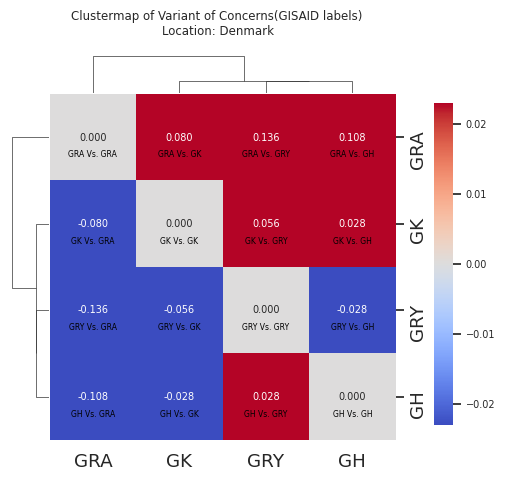

In [18]:
gry_gh_den = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Denmark_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_den = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Denmark_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_den = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Denmark_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_den = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_den,
                                                    gh_gk_den,
                                                    gk_gra_den,
                                                    'Denmark')
combined_distance_matrix_den = pd.DataFrame(clustermap_obj_den.data)

## Germany

In [19]:
# #automation function finds the diatance matrix
automation_mine('Germany', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Germany', df_weekly_sum, start = '2021-04', end = '2021-05', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Germany', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Germany : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.031345
GH   0.031345  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Germany_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Germany : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-04', '2021-05']
Diatance matrix: 
           GH        GK
GH  0.000000  0.023445
GK  0.023445  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Germany_2021-04_2021-05_gisaid_dist_mat.csv
Vaiants available at Germany : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.072273
GRA  0.072273  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Germany_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.031345  0.054790  0.127063
GH   0.031345  0.000000  0.023445  0.095718
GK   0.054790  0.023445  0.000000  0.072273
GRA  0.127063  0.095718  0.072273  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Germany_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.031345 -0.054790 -0.127063
GH   0.031345  0.000000 -0.023445 -0.095718
GK   0.054790  0.023445  0.000000 -0.072273
GRA  0.127063  0.095718  0.072273  0.000000


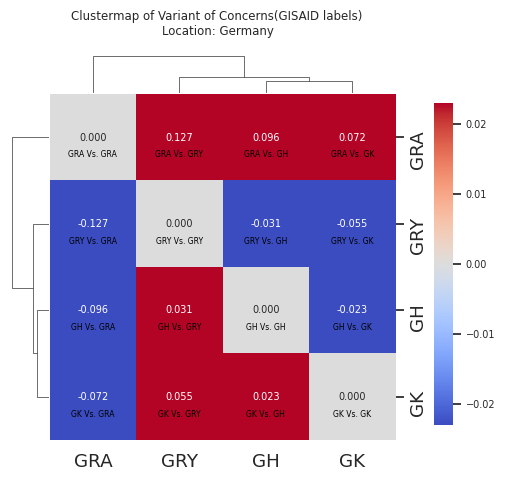

In [20]:
gry_gh_gr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Germany_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_gr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Germany_2021-04_2021-05_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_gr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Germany_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_gr = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_gr,
                                                    gh_gk_gr,
                                                    gk_gra_gr,
                                                    'Germany')
combined_distance_matrix_gr = pd.DataFrame(clustermap_obj_gr.data)

## Ireland

In [21]:
# #automation function finds the diatance matrix
automation_mine('Ireland', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Ireland', df_weekly_sum, start = '2021-04', end = '2021-05', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Ireland', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Ireland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.016212
GH   0.016212  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Ireland_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Ireland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-04', '2021-05']
Diatance matrix: 
           GH        GK
GH  0.000000  0.047358
GK  0.047358  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Ireland_2021-04_2021-05_gisaid_dist_mat.csv
Vaiants available at Ireland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.064144
GRA  0.064144  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Ireland_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.016212  0.063570  0.127714
GH   0.016212  0.000000  0.047358  0.111502
GK   0.063570  0.047358  0.000000  0.064144
GRA  0.127714  0.111502  0.064144  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Ireland_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.016212 -0.063570 -0.127714
GH   0.016212  0.000000 -0.047358 -0.111502
GK   0.063570  0.047358  0.000000 -0.064144
GRA  0.127714  0.111502  0.064144  0.000000


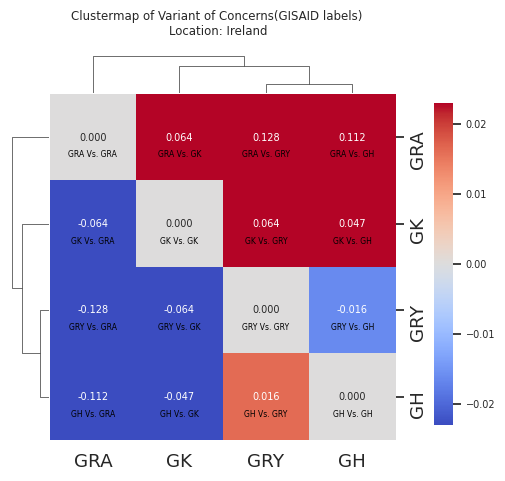

In [22]:
gry_gh_ir = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Ireland_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_ir = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Ireland_2021-04_2021-05_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_ir = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Ireland_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_ir = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_ir,
                                                    gh_gk_ir,
                                                    gk_gra_ir,
                                                    'Ireland')
combined_distance_matrix_ir = pd.DataFrame(clustermap_obj_ir.data)

## Israel

In [23]:
# #automation function finds the diatance matrix
automation_mine('Israel', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Israel', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Israel', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Israel : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
          GRY       GH
GRY  0.00000  0.01375
GH   0.01375  0.00000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Israel_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Israel : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.035711
GK  0.035711  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Israel_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Israel : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.075807
GRA  0.075807  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Israel_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.013750  0.049462  0.125269
GH   0.013750  0.000000  0.035711  0.111518
GK   0.049462  0.035711  0.000000  0.075807
GRA  0.125269  0.111518  0.075807  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Israel_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.013750 -0.049462 -0.125269
GH   0.013750  0.000000 -0.035711 -0.111518
GK   0.049462  0.035711  0.000000 -0.075807
GRA  0.125269  0.111518  0.075807  0.000000


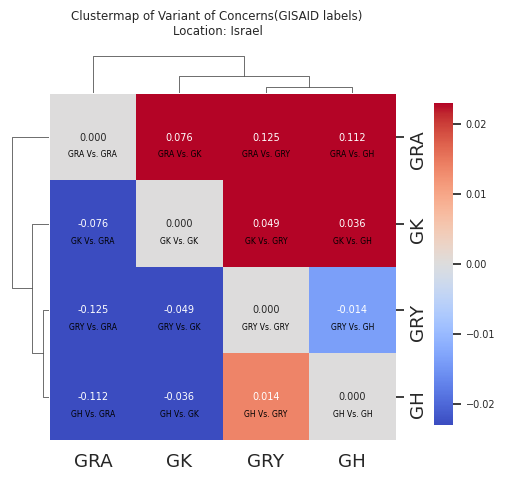

In [24]:
gry_gh_is = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Israel_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_is = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Israel_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_is = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Israel_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_is = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_is,
                                                    gh_gk_is,
                                                    gk_gra_is,
                                                    'Israel')
combined_distance_matrix_is = pd.DataFrame(clustermap_obj_is.data)

## Italy

In [25]:
 # #automation function finds the diatance matrix
automation_mine('Italy', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Italy', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Italy', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Italy : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
          GRY       GH
GRY  0.00000  0.01879
GH   0.01879  0.00000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Italy_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Italy : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.010051
GK  0.010051  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Italy_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Italy : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.074666
GRA  0.074666  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Italy_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.018790  0.028841  0.103507
GH   0.018790  0.000000  0.010051  0.084717
GK   0.028841  0.010051  0.000000  0.074666
GRA  0.103507  0.084717  0.074666  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Italy_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.018790 -0.028841 -0.103507
GH   0.018790  0.000000 -0.010051 -0.084717
GK   0.028841  0.010051  0.000000 -0.074666
GRA  0.103507  0.084717  0.074666  0.000000


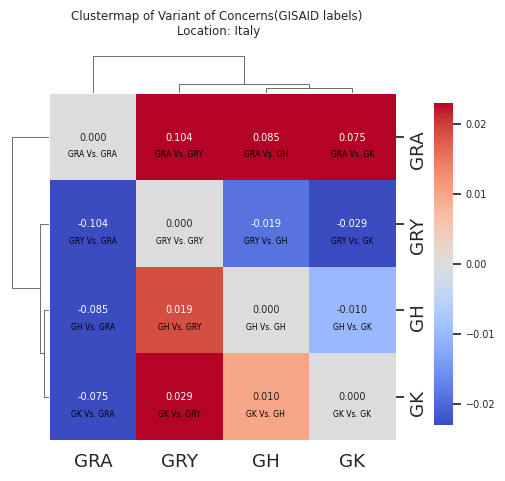

In [26]:
gry_gh_it = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Italy_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_it = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Italy_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_it = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Italy_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_it = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_it,
                                                    gh_gk_it,
                                                    gk_gra_it,
                                                    'Italy')
combined_distance_matrix_it = pd.DataFrame(clustermap_obj_it.data)

## Japan

In [27]:
 # #automation function finds the diatance matrix
automation_mine('Japan', df_weekly_sum, start = '2021-02', end = '2021-03', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Japan', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Japan', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Japan : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-02', '2021-03']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.011803
GH   0.011803  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Japan_2021-02_2021-03_gisaid_dist_mat.csv
Vaiants available at Japan : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.010952
GK  0.010952  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Japan_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Japan : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.049638
GRA  0.049638  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Japan_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.011803  0.022755  0.072393
GH   0.011803  0.000000  0.010952  0.060590
GK   0.022755  0.010952  0.000000  0.049638
GRA  0.072393  0.060590  0.049638  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Japan_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.011803 -0.022755 -0.072393
GH   0.011803  0.000000 -0.010952 -0.060590
GK   0.022755  0.010952  0.000000 -0.049638
GRA  0.072393  0.060590  0.049638  0.000000


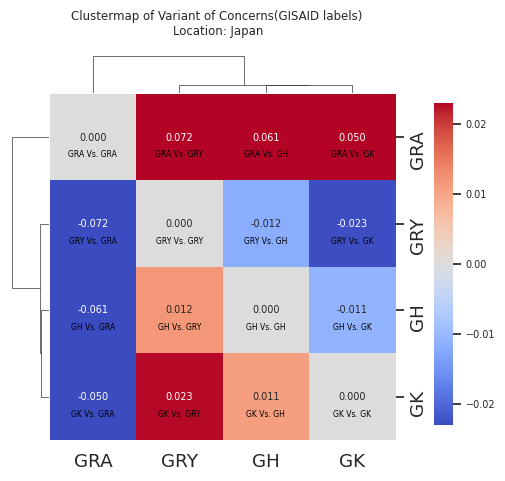

In [28]:
gry_gh_jp = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Japan_2021-02_2021-03_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_jp = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Japan_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_jp = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Japan_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_jp = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_jp,
                                                    gh_gk_jp,
                                                    gk_gra_jp,
                                                    'Japan')
combined_distance_matrix_jp = pd.DataFrame(clustermap_obj_jp.data)

## Netherlands

In [29]:
 # #automation function finds the diatance matrix
automation_mine('Netherlands', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Netherlands', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Netherlands', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Netherlands : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.022083
GH   0.022083  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Netherlands_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Netherlands : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.027081
GK  0.027081  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Netherlands_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Netherlands : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.058983
GRA  0.058983  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Netherlands_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.022083  0.049164  0.108147
GH   0.022083  0.000000  0.027081  0.086064
GK   0.049164  0.027081  0.000000  0.058983
GRA  0.108147  0.086064  0.058983  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Netherlands_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.022083 -0.049164 -0.108147
GH   0.022083  0.000000 -0.027081 -0.086064
GK   0.049164  0.027081  0.000000 -0.058983
GRA  0.108147  0.086064  0.058983  0.000000


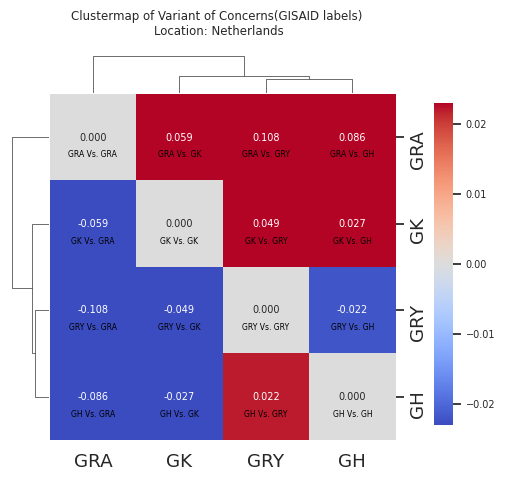

In [30]:
gry_gh_ne = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Netherlands_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_ne = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Netherlands_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_ne = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Netherlands_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_ne = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_ne,
                                                    gh_gk_ne,
                                                    gk_gra_ne,
                                                    'Netherlands')
combined_distance_matrix_ne = pd.DataFrame(clustermap_obj_ne.data)

## Poland

In [31]:
 # #automation function finds the diatance matrix
automation_mine('Poland', df_weekly_sum, start = '2021-01', end = '2021-02', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Poland', df_weekly_sum, start = '2021-06', end = '2021-07', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Poland', df_weekly_sum, start = '2021-12', end = '2022-01', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Poland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-01', '2021-02']
Diatance matrix: 
          GRY       GH
GRY  0.00000  0.02617
GH   0.02617  0.00000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Poland_2021-01_2021-02_gisaid_dist_mat.csv
Vaiants available at Poland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-06', '2021-07']
Diatance matrix: 
           GH        GK
GH  0.000000  0.017246
GK  0.017246  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Poland_2021-06_2021-07_gisaid_dist_mat.csv
Vaiants available at Poland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-12', '2022-01']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.052696
GRA  0.052696  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Poland_2021-12_2022-01_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.026170  0.043415  0.096111
GH   0.026170  0.000000  0.017246  0.069942
GK   0.043415  0.017246  0.000000  0.052696
GRA  0.096111  0.069942  0.052696  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Poland_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.026170 -0.043415 -0.096111
GH   0.026170  0.000000 -0.017246 -0.069942
GK   0.043415  0.017246  0.000000 -0.052696
GRA  0.096111  0.069942  0.052696  0.000000


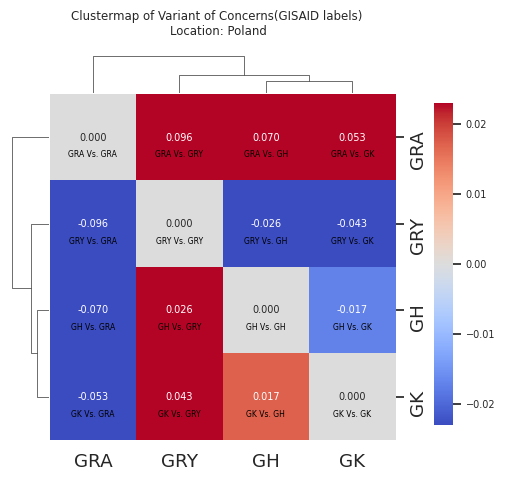

In [32]:
gry_gh_po = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Poland_2021-01_2021-02_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_po = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Poland_2021-06_2021-07_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_po = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Poland_2021-12_2022-01_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_po = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_po,
                                                    gh_gk_po,
                                                    gk_gra_po,
                                                    'Poland')
combined_distance_matrix_po = pd.DataFrame(clustermap_obj_po.data)

## South Korea

In [33]:
 # #automation function finds the diatance matrix
automation_mine('South Korea', df_weekly_sum, start = '2020-12', end = '2021-02', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('South Korea', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('South Korea', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at South Korea : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01', '2021-02']
Diatance matrix: 
          GRY       GH
GRY  0.00000  0.01445
GH   0.01445  0.00000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/South Korea_2020-12_2021-02_gisaid_dist_mat.csv
Vaiants available at South Korea : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.019202
GK  0.019202  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/South Korea_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at South Korea : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.045216
GRA  0.045216  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/South Korea_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.014450  0.033653  0.078869
GH   0.014450  0.000000  0.019202  0.064418
GK   0.033653  0.019202  0.000000  0.045216
GRA  0.078869  0.064418  0.045216  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/South Korea_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.014450 -0.033653 -0.078869
GH   0.014450  0.000000 -0.019202 -0.064418
GK   0.033653  0.019202  0.000000 -0.045216
GRA  0.078869  0.064418  0.045216  0.000000


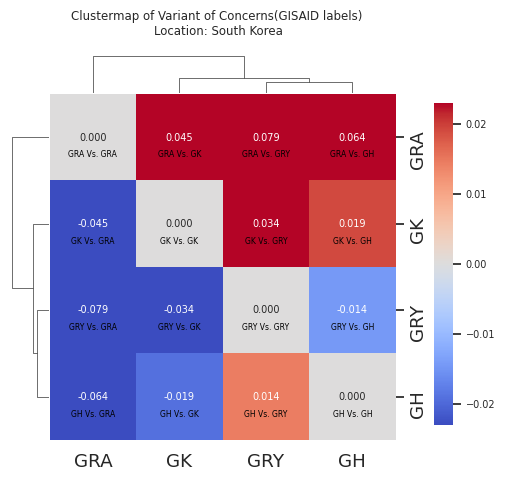

In [34]:
gry_gh_sk = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/South Korea_2020-12_2021-02_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_sk = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/South Korea_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_sk = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/South Korea_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_sk = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_sk,
                                                    gh_gk_sk,
                                                    gk_gra_sk,
                                                    'South Korea')
combined_distance_matrix_sk = pd.DataFrame(clustermap_obj_sk.data)

## Spain

In [35]:
 # #automation function finds the diatance matrix
automation_mine('Spain', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Spain', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Spain', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Spain : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.035628
GH   0.035628  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Spain_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Spain : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.011706
GK  0.011706  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Spain_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Spain : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.067805
GRA  0.067805  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Spain_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.035628  0.047333  0.115138
GH   0.035628  0.000000  0.011706  0.079510
GK   0.047333  0.011706  0.000000  0.067805
GRA  0.115138  0.079510  0.067805  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Spain_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.035628 -0.047333 -0.115138
GH   0.035628  0.000000 -0.011706 -0.079510
GK   0.047333  0.011706  0.000000 -0.067805
GRA  0.115138  0.079510  0.067805  0.000000


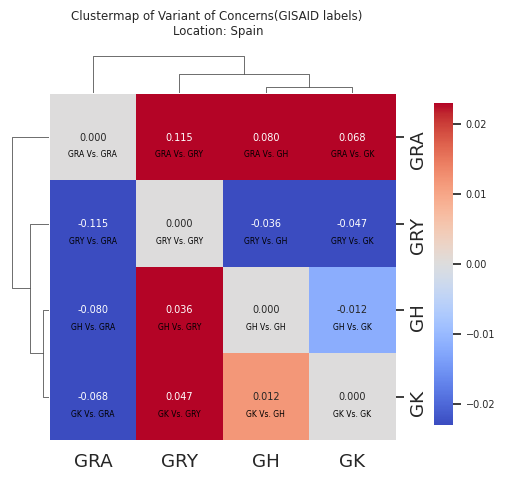

In [36]:
gry_gh_sp = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Spain_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_sp = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Spain_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_sp = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Spain_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_sp = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_sp,
                                                    gh_gk_sp,
                                                    gk_gra_sp,
                                                    'Spain')
combined_distance_matrix_sp = pd.DataFrame(clustermap_obj_sp.data)

## Switzerland 

In [37]:
 # #automation function finds the diatance matrix
automation_mine('Switzerland', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Switzerland', df_weekly_sum, start = '2021-06', end = '2021-07', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Switzerland', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Switzerland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.029671
GH   0.029671  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Switzerland_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Switzerland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-06', '2021-07']
Diatance matrix: 
           GH        GK
GH  0.000000  0.028752
GK  0.028752  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Switzerland_2021-06_2021-07_gisaid_dist_mat.csv
Vaiants available at Switzerland : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.071165
GRA  0.071165  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Switzerland_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.029671  0.058423  0.129588
GH   0.029671  0.000000  0.028752  0.099917
GK   0.058423  0.028752  0.000000  0.071165
GRA  0.129588  0.099917  0.071165  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Switzerland_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.029671 -0.058423 -0.129588
GH   0.029671  0.000000 -0.028752 -0.099917
GK   0.058423  0.028752  0.000000 -0.071165
GRA  0.129588  0.099917  0.071165  0.000000


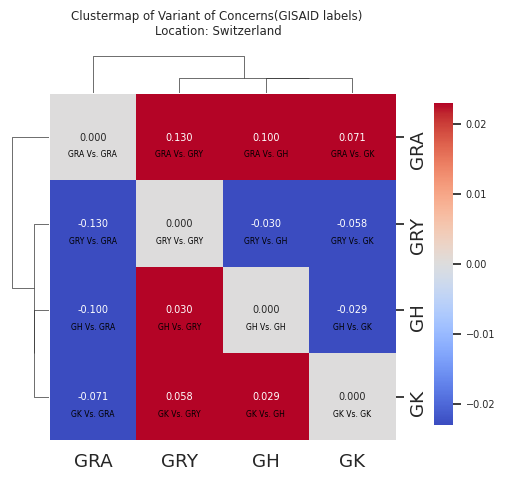

In [38]:
gry_gh_sw = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Switzerland_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_sw  = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Switzerland_2021-06_2021-07_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_sw = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Switzerland_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_sw  = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_sw ,
                                                    gh_gk_sw ,
                                                    gk_gra_sw ,
                                                    'Switzerland')
combined_distance_matrix_sw = pd.DataFrame(clustermap_obj_sw.data)

## Turkey

In [39]:
 # #automation function finds the diatance matrix
automation_mine('Turkey', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Turkey', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Turkey', df_weekly_sum, start = '2021-12', end = '2022-01', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Turkey : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.048035
GH   0.048035  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Turkey_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at Turkey : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
          GH       GK
GH  0.00000  0.06028
GK  0.06028  0.00000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Turkey_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Turkey : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-12', '2022-01']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.053486
GRA  0.053486  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Turkey_2021-12_2022-01_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.048035  0.108315  0.161801
GH   0.048035  0.000000  0.060280  0.113766
GK   0.108315  0.060280  0.000000  0.053486
GRA  0.161801  0.113766  0.053486  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Turkey_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.048035 -0.108315 -0.161801
GH   0.048035  0.000000 -0.060280 -0.113766
GK   0.108315  0.060280  0.000000 -0.053486
GRA  0.161801  0.113766  0.053486  0.000000


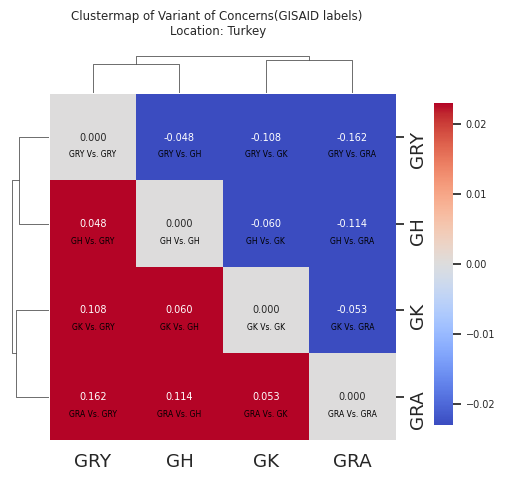

In [40]:
gry_gh_tr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Turkey_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_tr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Turkey_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_tr = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Turkey_2021-12_2022-01_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_tr  = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_tr ,
                                                    gh_gk_tr ,
                                                    gk_gra_tr ,
                                                    'Turkey')
combined_distance_matrix_tr = pd.DataFrame(clustermap_obj_tr.data)

## USA

In [41]:
 # #automation function finds the diatance matrix
automation_mine('USA', df_weekly_sum, start = '2020-12', end = '2021-01', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('USA', df_weekly_sum, start = '2021-03', end = '2021-04', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('USA', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at USA : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2020-12', '2021-01']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.040847
GH   0.040847  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_2020-12_2021-01_gisaid_dist_mat.csv
Vaiants available at USA : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-03', '2021-04']
Diatance matrix: 
           GH        GK
GH  0.000000  0.007299
GK  0.007299  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_2021-03_2021-04_gisaid_dist_mat.csv
Vaiants available at USA : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.082238
GRA  0.082238  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.040847  0.048146  0.130383
GH   0.040847  0.000000  0.007299  0.089537
GK   0.048146  0.007299  0.000000  0.082238
GRA  0.130383  0.089537  0.082238  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.040847 -0.048146 -0.130383
GH   0.040847  0.000000 -0.007299 -0.089537
GK   0.048146  0.007299  0.000000 -0.082238
GRA  0.130383  0.089537  0.082238  0.000000


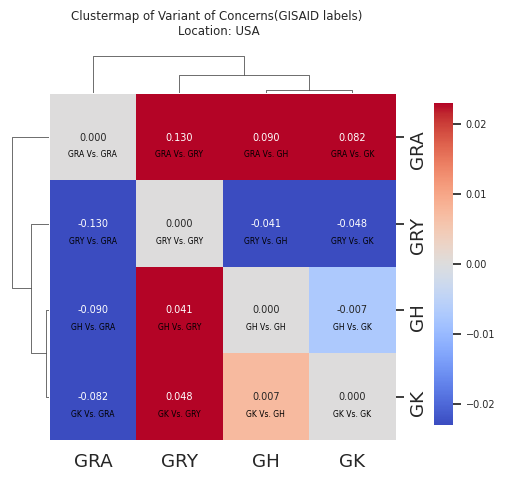

In [42]:
gry_gh_us = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_2020-12_2021-01_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_us = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_2021-03_2021-04_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_us = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/USA_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_us  = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_us ,
                                                    gh_gk_us ,
                                                    gk_gra_us ,
                                                    'USA')
combined_distance_matrix_us = pd.DataFrame(clustermap_obj_us.data)

## Mexico

In [43]:
 # #automation function finds the diatance matrix
automation_mine('Mexico', df_weekly_sum, start = '2021-03', end = '2021-04', variant_choice_set= {'GRY', 'GH'})
# #automation function finds the diatance matrix
automation_mine('Mexico', df_weekly_sum, start = '2021-05', end = '2021-06', variant_choice_set= {'GH', 'GK'})
# #automation function finds the diatance matrix
automation_mine('Mexico', df_weekly_sum, start = '2021-11', end = '2021-12', variant_choice_set= {'GK', 'GRA'})

Vaiants available at Mexico : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-03', '2021-04']
Diatance matrix: 
           GRY        GH
GRY  0.000000  0.012336
GH   0.012336  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Mexico_2021-03_2021-04_gisaid_dist_mat.csv
Vaiants available at Mexico : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-05', '2021-06']
Diatance matrix: 
           GH        GK
GH  0.000000  0.020607
GK  0.020607  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Mexico_2021-05_2021-06_gisaid_dist_mat.csv
Vaiants available at Mexico : ['GH' 'GK' 'GR' 'GRA' 'GRY']
['2021-11', '2021-12']
Diatance matrix: 
            GK       GRA
GK   0.000000  0.071153
GRA  0.071153  0.000000
Distance matrix saved at: /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Mexico_2021-11_2021-12_gisaid_dist_mat.csv


Distance Matrix :
           GRY        GH        GK       GRA
GRY  0.000000  0.012336  0.032943  0.104097
GH   0.012336  0.000000  0.020607  0.091761
GK   0.032943  0.020607  0.000000  0.071153
GRA  0.104097  0.091761  0.071153  0.000000
Combined distance matrix saved at : /scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Mexico_continent_combined_distance_matrix_for_gisaid_labels.csv
difference matrix :
           GRY        GH        GK       GRA
GRY  0.000000 -0.012336 -0.032943 -0.104097
GH   0.012336  0.000000 -0.020607 -0.091761
GK   0.032943  0.020607  0.000000 -0.071153
GRA  0.104097  0.091761  0.071153  0.000000


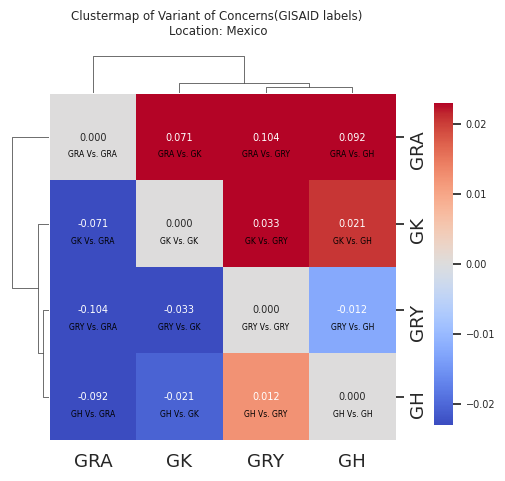

In [44]:
gry_gh_mx = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Mexico_2021-03_2021-04_gisaid_dist_mat.csv',
    index_col=0)
gh_gk_mx = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Mexico_2021-05_2021-06_gisaid_dist_mat.csv',
    index_col= 0)
gk_gra_mx = pd.read_csv(
    '/scr/mjpantho/Pantho_differential_fitness/distance_matrix_for_step_plot/Mexico_2021-11_2021-12_gisaid_dist_mat.csv',
    index_col=0)

clustermap_obj_mx  = heatmaps_from_combined_dist_map(['GH', 'GRY', 'GK', 'GRA'],
                                                    gry_gh_mx ,
                                                    gh_gk_mx ,
                                                    gk_gra_mx ,
                                                    'Mexico')
combined_distance_matrix_mx = pd.DataFrame(clustermap_obj_mx.data)